# Имитационное моделирование финансово-экономических систем
## Домашняя работа 1, СМО
## Поздняков Виталий
___

_Задачу, представленную ниже, необходимо решить аналитически. Для этой же задачи написать имитационную модель в Python, а также ввести и обосновать метрику совпадения экспериментального решения с теоретическим (творческая компонента). Оцените скорость сходимости решения по введенной метрике (ошибка как функция номера итерации) или разъясните причины отсутствия сходимости._

### Задача 2

На некоторую базу в среднем через 30 мин прибывают автомашины с продукцией. Среднее время разгрузки одной машины составляет 1,5 часа. Разгрузку производят две бригады грузчиков. На территории базы могут находиться в очереди в ожидании разгрузки не более 4 автомашин. Определить показатели работы СМО.


### Аналитическое решение

Для начала классифицируем СМО. 
* По числу каналов: 2-канальная ($n = 2$)
* По дисциплине обслуживания: смешанного типа с ограничением на длину очереди в 4 заявки ($m = 4$)
* По ограничению потока заявок: открытая
* По количеству этапов обслуживания: однофазная

Опишем математическую модель такой системы в виде графа состояний СМО

<img src='hw1_graph.png' width=550>

Состояния СМО: 
* $S_0$ — все каналы свободны
* $S_1$ — 1 канал занят, заявок в очереди нет
* $S_2$ — 2 канала заняты, заявок в очереди нет
* $S_3$ — 2 канала заняты, 1 заявка в очереди
* $S_4$ — 2 канала заняты, 2 заявки в очереди
* $S_5$ — 2 канала заняты, 3 заявки в очереди
* $S_6$ — 2 канала заняты, 4 заявки в очереди

Запишем систему уравнений предельных вероятностей

$$\begin{cases}
\lambda p_0 = \mu p_1 \\
\lambda p_1 = 2\mu p_2 \\
\lambda p_2 = 2\mu p_3 \\
\dots \\
\lambda p_5 = 2\mu p_6 \\
\end{cases}$$

где $p_i$ — вероятность нахождения системы в состоянии $S_i$

Обозначим $\rho = \lambda / \mu$. Тогда из первого уравнения следует
$$p_1 = \frac{\lambda}{\mu} p_0 = \rho p_0$$

Из второго и третьего: 
$$\begin{matrix}
p_2 = \frac{1}{2}\rho p_1 = \frac{1}{2}\rho^2p_0 \\
p_3 = \frac{1}{2^2}\rho^3p_0
\end{matrix}$$

И так далее в общем виде получаем
$$p_k = \frac{1}{2^{k-1}}\rho^k p_0$$

Таким образом
$$p_0 + p_1 + \dots + p_6 = 1 
\\
p_0\left(1 + \rho + \frac{1}{2}\rho^2 + \dots + \frac{1}{2^5}\rho^6 \right) = 1
\\
p_0 = \left(1 + \rho + \frac{1}{2}\rho^2 + \dots + \frac{1}{2^5}\rho^6 \right)^{-1}
$$

Рассмотрим выражение в скобках. Используем свойства суммы геометрической прогрессии и получаем
$$1 + \rho + \frac{1}{2}\rho^2 + \frac{1}{2^2}\rho^3 + \dots + \frac{1}{2^5}\rho^6
\\ = 1 + \rho \left(1 + \frac{\rho}{2} + \left(\frac{\rho}{2}\right)^2 + \dots + \left(\frac{\rho}{2}\right)^5 \right)
\\ = 1 + \rho \left( \frac{1 - \left(\frac{\rho}{2} \right)^6}{1 - \frac{\rho}{2}}\right)$$

Тогда вероятность того, что система находится в состоянии свободных каналов

$$p_0 = \left(1 + \rho \left( \frac{1 - \left(\frac{\rho}{2} \right)^6}{1 - \frac{\rho}{2}}\right) \right)^{-1}$$

По условию задачи установим входящую интенсивность потока как $\lambda = \frac{60}{30} = 2$ (машины в час), а интенсивность потока обслуживания как $\mu = \frac{1}{1.5} = \frac{2}{3}$ (машины в час). Тогда $\rho = \lambda / \mu = \frac{2}{1} \cdot \frac{3}{2} = 3$. 

In [1]:
mu = 2/3
rho = 3
p0 = (1 + rho*((1 - (rho/2)**6) / (1 - rho/2)))**(-1)
def prob(k):
    res = rho**k * p0 / 2**(k-1)
    return res
prob_list = []
prob_list.append(p0)
for i in range(1, 7):
    prob_list.append(prob(i))

In [2]:
import matplotlib.pyplot as plt

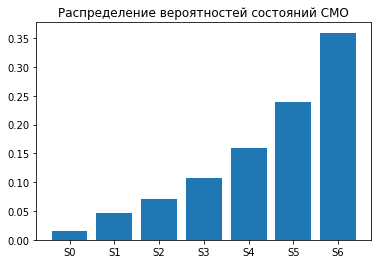

In [3]:
plt.bar(['S{}'.format(i) for i in range(7)], prob_list)
plt.title('Распределение вероятностей состояний СМО')
plt.show()

#### 1. Найдем вероятность отказа
$$P_{\text{отк}} = p_6 = \frac{1}{2^{5}}\rho^6 p_0$$

In [4]:
p_rej = prob_list[6]
p_rej

0.3596447952639369

$$P_{\text{отк}} \approx 0.3596$$

#### 2. Найдем относительную пропускную способность
$$Q = 1 - P_{\text{отк}}$$

In [5]:
q = 1 - p_rej
q

0.6403552047360631

$$Q \approx 0.6404$$

#### 3. Найдем абсолютную пропускную способность
$$A = \lambda Q$$

In [6]:
lambd = 2
a = lambd * q
a

1.2807104094721262

$$A \approx 1.2807$$

#### 4. Найдем среднее число заявок в очереди

$$L_\text{оч}=\mathbb E (k) = 0 \cdot (p_0 + p_1 + p_2) + 1 \cdot p_3 + 2 \cdot p_4 + 3 \cdot p_5 + 4 \cdot p_6$$

где $k$ — случайная величина количества заявок в очереди

In [7]:
l = 1*prob_list[3] + 2*prob_list[4] + 3*prob_list[5] + 4*prob_list[6]
l

2.5841144548593986

$$L_\text{оч} \approx 2.5841$$

#### 5. Найдем среднее время ожидания заявки в очереди по формуле Литтла
$$\overline{T}_\text{оч} = \frac{L_{оч}}{\lambda}$$

In [8]:
t = l / lambd
t

1.2920572274296993

$$\overline{T}_\text{оч} \approx 1.2921$$

#### 6. Найдем коэффициент использования СМО
$$K_{исп} = 1 - p_0$$

In [9]:
k_use = 1 - prob_list[0]
k_use

0.9842131228416379

$$K_{исп} \approx 0.9842$$

#### 7. Найдем среднее время пребывания заявки в СМО. 

Рассмотрим гипотезы $S_0, \dots, S_6$ нахождения системы в соответствующих состояниях. Тогда среднее время пребывания можно записать как

$$\overline T_{преб} = \mathbb E(T_{преб}) = \sum_{i=0}^6P(S_i) \mathbb E(T_{преб}|S_i)
\\ = p_0 \cdot 0 + p_1 \cdot \frac{2}{2\mu} + p_2 \cdot \frac{3}{2\mu} + p_3 \cdot \frac{4}{2\mu} + p_4 \cdot \frac{5}{2\mu} + p_5 \cdot \frac{6}{2\mu} + p_6 \cdot 0$$

In [10]:
t_proc = 0
for i in range(1, 6):
    t_proc += prob_list[i] * (i+1) / (2*mu)
t_proc

2.2289097187962508

$$\overline T_{преб} \approx 2.2289$$

#### 8. Найдем вероятность немедленного приема к обслуживанию. 

Другими словами, найдем вероятность нахождения системы в состоянии хотя бы одного свободного канала, то есть $S_1$ или $S_2$
$$P_{обсл} = p_0 + p_1$$

In [11]:
p_serve = prob_list[0] + prob_list[1]
p_serve

0.06314750863344845

$$P_{обсл} \approx 0.0631$$

$$F(x) = P(X\leq x) = p_0 \cdot F_0(x) + p_1 \cdot F_1(x) + \dots + p_n \cdot F_n(x)$$

#### 9. Найдем среднее число заявок в СМО
$$ L_{СМО} = p_0 \cdot 0 + p_1 \cdot 1 + p_2 \cdot 2 + \dots + p_6 \cdot 6$$

In [12]:
l_cmo = 0
for i in range(1, 7):
    l_cmo += i * prob_list[i]
l_cmo

4.505180069067588

$$ L_{СМО} \approx 4.5052$$

#### 10. Найдем закон распределения времени ожидания заявки в очереди. 

Распределение времени зависит от того, в каком состоянии находилась система во время поступления заявки. Например, если заявка пришла в момент хотя бы одного свободного канала, то она мгновенно поступит в обработку и не будет ожидать в очереди. Аналогичная ситуация возникает в состоянии переполнения очереди — заявка просто не попадает в систему, соответственно не ожидает в очереди. Во всех остальных состояниях время ожидания будет варьироваться от количества заявок в очереди. Обозначим эти два случая как две гипотезы

$$H_1 = S_0 \cup S_1 \cup S_6 \\
H_2 = S_1 \cup S_2 \cup S_3 \cup S_4$$

Для гипотезы $H_1$ время в очереди всегда равно 0, то есть такая случайная величина $T_1$ будет иметь дискретную функцию вероятности вида

$$P(T_1=t|H_1) = \mathbb 1\{t=0\}$$

Теперь рассмотрим другие состояния. Например, если заявка приходит в момент состояния $S_5$, то ей придется занять 4 позицию в очереди. Тогда ее время ожидания в очереди будет складываться из 4 интервалов, каждый из которых является реализацией экспоненциальной СВ. Такая случайная величина имеет распределение Эрланга и задается функцией плотности вида

$$f_{k; \nu}(x) = \frac{\nu^k x^{k-1}e^{-\nu x}}{(k-1)!}$$

где $k$ — количество экспоненциальных распределений, а $\nu$ — интенсивность потока. Тогда для $S_5$ имеем $k = 4$, а $\nu = 2\mu$. Функция плотности для состояния $S_4$ задается аналогично с параметрами $k=3$, $\nu=2\mu$. Запишем параметры для каждого состояния

$$
S_2: k=1, \nu=2\mu \\
S_3: k=2, \nu=2\mu \\
S_4: k=3, \nu=2\mu \\
S_5: k=4, \nu=2\mu
$$

Теперь с учетом вероятностей каждого из состояний можно записать общий вид плотности распределения случайной величины $T_2$ для гипотезы $H_2$

$$\varphi(t|H_2) = \frac{p_2 \cdot f_{1;2\mu}(t) + p_3 \cdot f_{2;2\mu}(t) + p_4 \cdot f_{3;2\mu}(t) + p_5 \cdot f_{4;2\mu}(t)}{p_2+p_3+p_4+p_5}$$

Построим график функции плотности

In [13]:
import numpy as np
from math import exp
from math import factorial

def erlang_pdf(k, nu, x):
    return (nu**k * x**(k-1) * exp(-nu*x)) / factorial(k-1)

def total_pdf(x):
    return (
        sum([prob_list[i]*erlang_pdf(i-1, 2*mu, x) for i in range(2, 6)]) 
        / 
        sum(prob_list[2:6])
    )

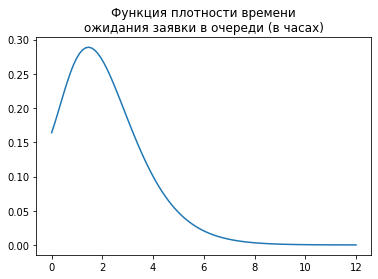

In [14]:
x_space = np.linspace(0, 12, 100)
y_space = [total_pdf(x) for x in x_space]
plt.plot(x_space, y_space)
plt.title('Функция плотности времени\nожидания заявки в очереди (в часах)')
plt.show()

Запишем полученные значения в таблицу

| Характеристика | Обозначение | Значение |
| :--- | :--- | :--- |
| Вероятность отказа | $P_{отк}$ | 0.3596 |
| Относительная пропускная способность | $Q$ | 0.6404 |
| Абсолютная пропускная способность | $A$ | 1.2807 |
| Среднее число заявок в очереди | $L_{оч}$ | 2.5841 |
| Коэффициент использования СМО | $K_{исп}$ | 0.9842 |
| Среднее время ожидания заявки в очереди | $\overline{T}_{оч}$ | 1.2921 |
| Среднее время пребывания заявки в СМО | $\overline T_{преб}$ | 2.2289 |
| Вероятность немедленного приема к обслуживанию | $P_{обсл}$ | 0.0631 |
| Среднее число заявок в СМО | $L_{СМО}$ | 4.5052 |



### Имитационно моделирование

In [15]:
import simpy

In [16]:
# 24 часовой формат времени
def now24(env):
    d = int(env.now // 60 // 24 + 1)
    h = int(env.now // 60 % 24)
    m = int(env.now % 60)
    return '[{:02} день, {:02}:{:02}]'.format(d, h, m)
    
# Генератор автомобилей
def setup(env, loaders, stats, queue_limit):
    i = 0
    while True:
        delay = np.random.exponential(1/lambd) * 60
        yield env.timeout(delay)
        save_stats(stats, env, loaders, True, delay)
        i += 1
        truck = Truck(env, '{}'.format(i), loaders, stats)
        stats['trucks'].append(truck)
        if (loaders.capacity == loaders.count 
            and len(loaders.queue) == queue_limit):
            log.append(
                '{} База переполнена, автомобиль #{} не смог заехать'.format(
                    now24(env), i))
        else:
            env.process(truck.run())

class Truck:
    def __init__(self, env, name, loaders, stats):
        self.env = env
        self.name = name
        self.loaders = loaders
        self.stats = stats
        self.born = env.now
        self.start = env.now
        self.finish = env.now
        
    def run(self):
        log.append(
            '{} Прибыл автомобиль #{}'.format(now24(self.env), self.name))
        with self.loaders.request() as request:
            yield request
            log.append(
                '{} Началась разгрузка автомобиля #{}'.format(
                    now24(self.env), self.name))
            self.start = self.env.now
            delay = np.random.exponential(1/mu) * 60
            yield self.env.timeout(delay)
            self.finish = self.env.now
            save_stats(self.stats, self.env, self.loaders, False, delay)
            log.append(
                '{} Завершилась разгрузка автомобиля #{}'.format(
                    now24(self.env), 
                    self.name))

# Сбор статистики
def save_stats(stats, env, loaders, in_counter, delay):
    delta_t = env.now - stats['data']['timeline'][-1]
    for i in range(7):
        stats['data']['state{}'.format(i)].append(
            delta_t if loaders.count+len(loaders.queue) == i else 0)
    stats['data']['timeline'].append(env.now)
    if in_counter:
        stats['in_counter'].append(delay)
    else:
        stats['out_counter'].append(delay)
    
    if len(stats['in_counter']):
        stats['data']['av_in'].append(
            sum(stats['in_counter'])/len(stats['in_counter']))
    else: stats['data']['av_in'].append(0)
    
    if len(stats['out_counter']):
        stats['data']['av_out'].append(
            sum(stats['out_counter'])/len(stats['out_counter']))
    else: stats['data']['av_out'].append(0)

In [17]:
np.random.seed(7)
lambd = 2
mu = 2/3
stats = {'data': {}, 
         'in_counter': [], 
         'out_counter': [],
         'trucks': []}
stats['data'] = {'timeline': [0], 
                 'state0': [0],
                 'state1': [0],
                 'state2': [0],
                 'state3': [0],
                 'state4': [0],
                 'state5': [0],
                 'state6': [0], 
                 'av_in': [0], 
                 'av_out': [0]}
log = []
env = simpy.Environment()
loaders = simpy.Resource(env, capacity=2)
env.process(setup(env, loaders, stats, queue_limit=4))
env.run(until=2*365*24*60) # 2 года имитации СМО

In [18]:
log[0:200] # первые 200 наблюдений

['[01 день, 00:02] Прибыл автомобиль #1',
 '[01 день, 00:02] Началась разгрузка автомобиля #1',
 '[01 день, 00:47] Прибыл автомобиль #2',
 '[01 день, 00:47] Началась разгрузка автомобиля #2',
 '[01 день, 00:54] Завершилась разгрузка автомобиля #1',
 '[01 день, 01:26] Прибыл автомобиль #3',
 '[01 день, 01:26] Началась разгрузка автомобиля #3',
 '[01 день, 01:49] Прибыл автомобиль #4',
 '[01 день, 01:51] Прибыл автомобиль #5',
 '[01 день, 02:01] Прибыл автомобиль #6',
 '[01 день, 02:21] Прибыл автомобиль #7',
 '[01 день, 02:28] Завершилась разгрузка автомобиля #3',
 '[01 день, 02:28] Началась разгрузка автомобиля #4',
 '[01 день, 02:56] Прибыл автомобиль #8',
 '[01 день, 03:10] База переполнена, автомобиль #9 не смог заехать',
 '[01 день, 03:12] База переполнена, автомобиль #10 не смог заехать',
 '[01 день, 03:22] База переполнена, автомобиль #11 не смог заехать',
 '[01 день, 04:34] База переполнена, автомобиль #12 не смог заехать',
 '[01 день, 04:42] База переполнена, автомобиль #13 не 

### Статистический анализ

Для удобства поместим реализацию нашей имитации в датасет типа `pandas.Dataframe`. В колонку `timeline` будем записывать текущее глобальное время системы в момент наблюдения (в минутах). В колонках `state` будем записывать время нахождения системы в соответствующем состоянии с момента предыдущего измерения. В колонках `av_in` и `av_out` будем записывать накопленное среднее время поступления и обработки заявок соответственно.

In [19]:
import pandas as pd

In [20]:
datatime = pd.DataFrame(stats['data'])
# Первые 10 наблюдений
datatime[0:10]

,timeline,state0,state1,state2,state3,state4,state5,state6,av_in,av_out
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2.381307,2.381307,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.381307,0.000000
2,47.794068,0.000000,45.412760,0.000000,0.000000,0.000000,0.000000,0.000000,23.897034,0.000000
3,54.309675,0.000000,0.000000,6.515608,0.000000,0.000000,0.000000,0.000000,23.897034,51.928368
4,86.356623,0.000000,32.046948,0.000000,0.000000,0.000000,0.000000,0.000000,28.785541,51.928368
5,109.554552,0.000000,0.000000,23.197928,0.000000,0.000000,0.000000,0.000000,27.388638,51.928368
6,111.797911,0.000000,0.000000,0.000000,2.243359,0.000000,0.000000,0.000000,22.359582,51.928368
7,121.175150,0.000000,0.000000,0.000000,0.000000,9.377239,0.000000,0.000000,20.195858,51.928368
8,141.962517,0.000000,0.000000,0.000000,0.000000,0.000000,20.787366,0.000000,20.280360,51.928368
9,148.941779,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.979263,20.280360,57.256762


Перед тем как перейти к оценкам характеристик сравним эмпирическое и аналитическое распределение вероятностей

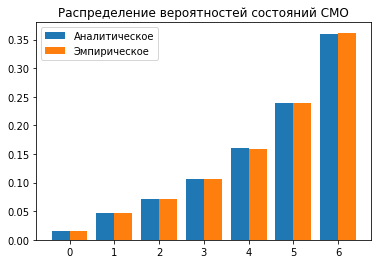

In [21]:
emp_prob = []
for i in range(7):
    emp_prob.append(
        datatime['state{}'.format(i)].sum()/datatime.timeline.values[-1])
labels = ['P{}'.format(i) for i in range(7)]
x = np.arange(7)
width = 0.4
plt.bar(x - width/2, prob_list, width, label='Аналитическое')
plt.bar(x + width/2, emp_prob, width, label='Эмпирическое')
plt.title('Распределение вероятностей состояний СМО')
plt.legend()
plt.show()

Можно заметить, что распределения довольно похожи, значит в целом параметры имитации заданы верно.

#### 1. Вероятность отказа $P_{отк}$

Будем использовать эффективную оценку вероятности отказа $\hat P_{отк} = \frac{T_6}{T_0+T_1+\dots+T_6}$ — доля времени нахождения системы в состоянии $S_6$.

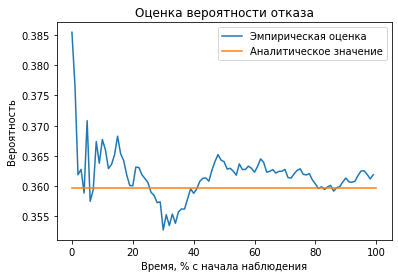

In [22]:
plot_data = []
maxtime = datatime.timeline.max()
# Пусть первый замер будет на 3000 минуте имитации
for i in np.linspace(3000, maxtime, 100):
    part_df = datatime.loc[datatime.timeline < i]
    plot_data.append(part_df.state6.sum()/part_df.timeline.values[-1])
plt.plot(plot_data, label='Эмпирическая оценка')
plt.plot(
    [0, 100], 
    [prob_list[6], prob_list[6]], label='Аналитическое значение')
plt.xlabel('Время, % с начала наблюдения')
plt.ylabel('Вероятность')
plt.title('Оценка вероятности отказа')
plt.legend()
plt.show()

Можно заметить, что со временем эмпирическая оценка приближается к аналитическому значению.

#### 2. Относительная пропускная способность $Q$

Эта характеристика оценивается как доля времени, в котором система находилась в любом состоянии кроме $S_6$. То есть она двойственна предыдущей характеристике, поэтому нет смысла ее оценивать отдельно. Очевидно, что со временем она приближается к аналитическому значению так же как и вероятность отказа.

#### 3. Абсолютная пропусная способность $A$

Эта характеристика определяется как $\lambda Q$, поэтому ее эффективной оценкой будет $$\hat A = \frac{1 - \hat P_{отк}}{\bar T_{вход}}$$где $\bar T_{вход}$ — среднее время появления автомобилей.

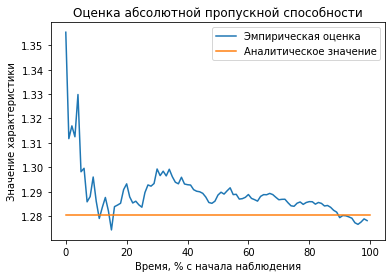

In [23]:
plot_data = []
for i in np.linspace(3000, maxtime, 100):
    part_df = datatime.loc[datatime.timeline < i]
    res = (
        (1 - part_df.state6.sum()/part_df.timeline.values[-1]) 
        / 
        (part_df.av_in.values[-1]/60)
    )
    plot_data.append(res)
plt.plot(plot_data, label='Эмпирическая оценка')
plt.plot([0, 100], [a, a], label='Аналитическое значение')
plt.xlabel('Время, % с начала наблюдения')
plt.ylabel('Значение характеристики')
plt.title('Оценка абсолютной пропускной способности')
plt.legend()
plt.show()

#### 4. Cреднее число заявок в очереди $L_{оч}$

Эффективной оценкой для этой характеристики будет взвешенная по доле времени сумма числа автомобилей в очереди

$$\hat L_{оч} = \frac{1 \cdot T_3 + 2 \cdot T_4 + 3 \cdot T_5 + 4 \cdot T_6}{T_0+T_1+\dots+T_6}$$

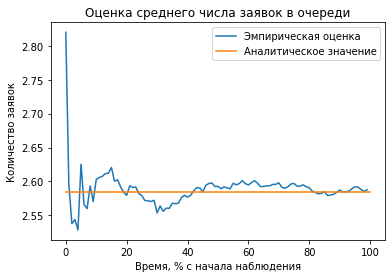

In [24]:
plot_data = []
for i in np.linspace(3000, maxtime, 100):
    part_df = datatime.loc[datatime.timeline < i]
    res = (
        sum([i*part_df['state{}'.format(i+2)].sum() for i in range(1, 5)])
        / part_df.timeline.values[-1])
    plot_data.append(res)
plt.plot(plot_data, label='Эмпирическая оценка')
plt.plot([0, 100], [l, l], label='Аналитическое значение')
plt.xlabel('Время, % с начала наблюдения')
plt.ylabel('Количество заявок')
plt.title('Оценка среднего числа заявок в очереди')
plt.legend()
plt.show()

#### 5. Cреднее время ожидания заявки в очереди $\overline{T}_\text{оч}$

Эффективной оценкой этого параметра будет средняя длина очереди, умноженная на среднее время появления автомобилей 

$$\bar T_{оч} = \hat L_{оч} \cdot \bar T_{вход}$$

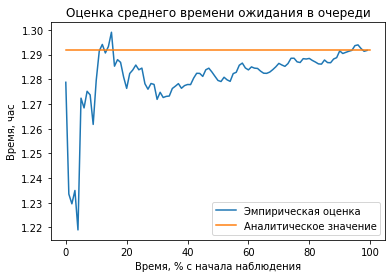

In [25]:
plot_data = []
for i in np.linspace(3000, maxtime, 100):
    part_df = datatime.loc[datatime.timeline < i]
    res = (
        sum([i*part_df['state{}'.format(i+2)].sum() for i in range(1, 5)]) 
        / part_df.timeline.values[-1]
        *
        (part_df.av_in.values[-1]/60))
    plot_data.append(res)
plt.plot(plot_data, label='Эмпирическая оценка')
plt.plot([0, 100], [t, t], label='Аналитическое значение')
plt.xlabel('Время, % с начала наблюдения')
plt.ylabel('Время, час')
plt.title('Оценка среднего времени ожидания в очереди')
plt.legend()
plt.show()

#### 6. Коэффициент использования СМО $K_{исп}$

Эффективной оценкой этой характеристики будет 

$$\hat K_{исп} = 1 - \hat p_0 = 1 - \frac{T_0}{T_0 + \dots + T_6}$$

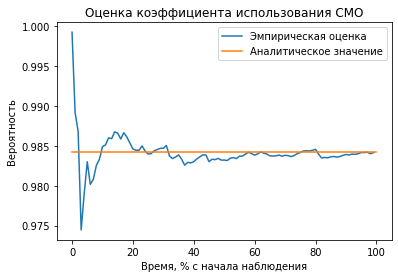

In [26]:
plot_data = []
maxtime = datatime.timeline.max()
for i in np.linspace(3000, maxtime, 100):
    part_df = datatime.loc[datatime.timeline < i]
    plot_data.append(
        1 - part_df.state0.sum()/part_df.timeline.values[-1])
plt.plot(plot_data, label='Эмпирическая оценка')
plt.plot([0, 100], [k_use, k_use], label='Аналитическое значение')
plt.xlabel('Время, % с начала наблюдения')
plt.ylabel('Вероятность')
plt.title('Оценка коэффициента использования СМО')
plt.legend()
plt.show()

#### 7. Cреднее время пребывания заявки в СМО $\overline T_{преб}$

Эффективная оценка этой характеристики $$\overline T_{преб} = \frac{\bar T_{обр}(T_1 \cdot 2 + \dots + T_5 \cdot 6)}{2(T_0+\dots+T_6)}$$

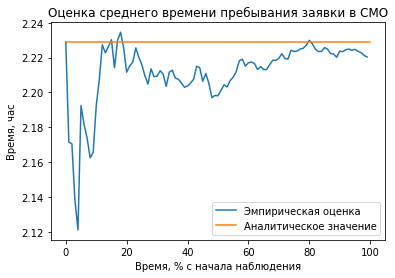

In [27]:
plot_data = []
maxtime = datatime.timeline.max()
for i in np.linspace(3000, maxtime, 100):
    part_df = datatime.loc[datatime.timeline < i]
    res = (
        (part_df.av_out.values[-1])
        *
        (sum(
            [(i+1)
             *part_df['state{}'.format(i)].sum() for i in range(1, 6)]))
        /
        (2*(part_df.timeline.values[-1]))) / 60
    plot_data.append(res)
plt.plot(plot_data, label='Эмпирическая оценка')
plt.plot([0, 100], [t_proc, t_proc], label='Аналитическое значение')
plt.xlabel('Время, % с начала наблюдения')
plt.ylabel('Время, час')
plt.title('Оценка среднего времени пребывания заявки в СМО')
plt.legend()
plt.show()

#### 8. Вероятность немедленного приема к обслуживанию $P_{обсл}$

Эффективная оценка этой характеристики $$\hat P_{обс} = \frac{T_0 + T_1}{T_0 + \dots + T_6}$$

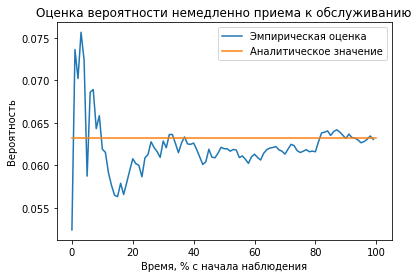

In [28]:
plot_data = []
maxtime = datatime.timeline.max()
for i in np.linspace(3000, maxtime, 100):
    part_df = datatime.loc[datatime.timeline < i]
    res = ((part_df.state0.sum() + part_df.state1.sum()) 
           / part_df.timeline.values[-1])
    plot_data.append(res)
plt.plot(plot_data, label='Эмпирическая оценка')
plt.plot([0, 100], [p_serve, p_serve], label='Аналитическое значение')
plt.xlabel('Время, % с начала наблюдения')
plt.ylabel('Вероятность')
plt.title('Оценка вероятности немедленно приема к обслуживанию')
plt.legend()
plt.show()

#### 9. Cреднее число заявок в СМО $L_{СМО}$
Эффективной оценкой этого параметра будет 

$$ \hat L_{СМО} = \frac{T_1 \cdot 1 + T_2 \cdot 2 + \dots + T_6 \cdot 6}{T_0+T_1+\dots+T_6}$$

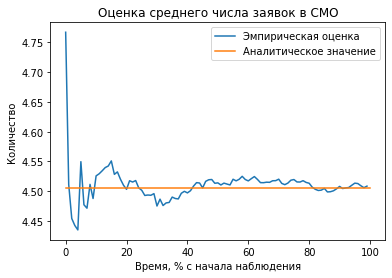

In [29]:
plot_data = []
maxtime = datatime.timeline.max()
for i in np.linspace(3000, maxtime, 100):
    part_df = datatime.loc[datatime.timeline < i]
    res = (
        (sum([i*part_df['state{}'.format(i)].sum() for i in range(1, 7)]))
        / part_df.timeline.values[-1])
    plot_data.append(res)
plt.plot(plot_data, label='Эмпирическая оценка')
plt.plot([0, 100], [l_cmo, l_cmo], label='Аналитическое значение')
plt.xlabel('Время, % с начала наблюдения')
plt.ylabel('Количество')
plt.title('Оценка среднего числа заявок в СМО')
plt.legend()
plt.show()

#### 10. Закон распределения времени ожидания заявки в очереди

Ранее мы ввели две гипотезы 

$$H_1 = S_0 \cup S_1 \cup S_6 \\
H_2 = S_1 \cup S_2 \cup S_3 \cup S_4$$

Для гипотезы $H_1$ определена только дискретная случайная величина $T_1$, которая принимает значение 0 с вероятностью 1, поэтому будем оценивать только гипотезу $H_2$. Для оценки распределения будем использовать нормированную гистограмму наблюдений, для которых время ожидания в очереди больше 0.

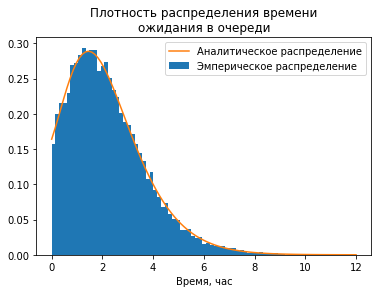

In [30]:
hist_data = []
for i_truck in stats['trucks']:
    if i_truck.start - i_truck.born > 0:
        hist_data.append((i_truck.start - i_truck.born)/60)
plt.hist(hist_data, bins=80, density=True, label='Эмперическое распределение')

x_space = np.linspace(0, 12, 100)
y_space = [total_pdf(x) for x in x_space]
plt.plot(x_space, y_space, label='Аналитическое распределение')

plt.xlabel('Время, час')
plt.title('Плотность распределения времени\nожидания в очереди')
plt.legend()

plt.show()

Для оценки сходимости с увеличением количества наблюдений будем использовать тест Колмогорова-Смирнова из пакета scipy, который использует функцию распределения. Для этого зададим функцию распределения нашей случайно величины $T_2$.

In [31]:
from scipy.stats import kstest
from scipy.special import gammainc

def erlang_cdf(k, nu, x):
    return gammainc(k, nu*x)

def total_cdf(x):
    return (sum([prob_list[i]*erlang_cdf(i-1, 2*mu, x) for i in range(2, 6)]) 
            / sum(prob_list[2:6]))

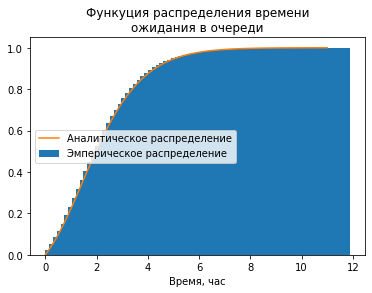

In [32]:
plt.hist(hist_data, 
         bins=80, 
         density=True, 
         cumulative=True, 
         label='Эмперическое распределение')

x_space = np.linspace(0, 11, 100)
y_space = [total_cdf(x) for x in x_space]
plt.plot(x_space, y_space, label='Аналитическое распределение')

plt.xlabel('Время, час')
plt.title('Функуция распределения времени\nожидания в очереди')
plt.legend()

plt.show()

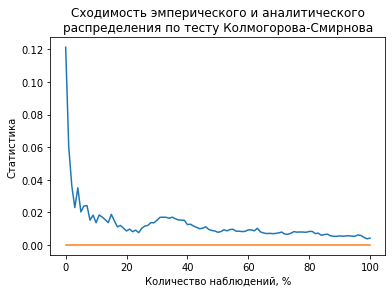

In [33]:
plot_data = []
for i in range(100, len(hist_data) - 1, 200):
    res = kstest(hist_data[:i], total_cdf).statistic
    plot_data.append(res)
plt.plot(plot_data)
plt.plot([0, 100], [0, 0])
plt.xlabel('Количество наблюдений, %')
plt.ylabel('Статистика')
plt.title('Сходимость эмперического и аналитического\nраспределения по тесту Колмогорова-Смирнова')
plt.show()

### Анализ скорости сходимости

Рассмотрим скорость сходимости на примере параметра $L_{СМО}$ — среднее число заявок в СМО. Наблюдения можно рассматривать как реализацию независимых случайных величин $L_1, L_2, \dots, L_n$ таких, что $\mathbb E[L_i] = m_i$, $\text{Var}(L_i) = \sigma^2_i$. Тогда можно применить одно из следствий центральной предельной теоремы

$$\varepsilon = t\sqrt\frac{\sigma^2}{n}$$

где $\varepsilon$ - предельная ошибка, $Ф(t)=\beta$ — вероятность, $Ф$ — функция Лапласа

Для вероятности $\sim 0.99$ воспользуемся правилом трех сигм, то есть $t = 3$. Так как параметр $\sigma^2$ неизвестен, будем использовать его оценку $s^2$

$$s^2 = \frac{\sum (L_i - \bar L)^2 n_i}{n}\\
\bar L = \frac{\sum L_i n_i}{n}$$

То есть для выбранного количества наблюдений $n$ с вероятностью $\sim0.99$ можно утверждать, что $L_{СМО} \in [\hat L_{СМО} - \varepsilon, \hat L_{СМО} + \varepsilon]$.

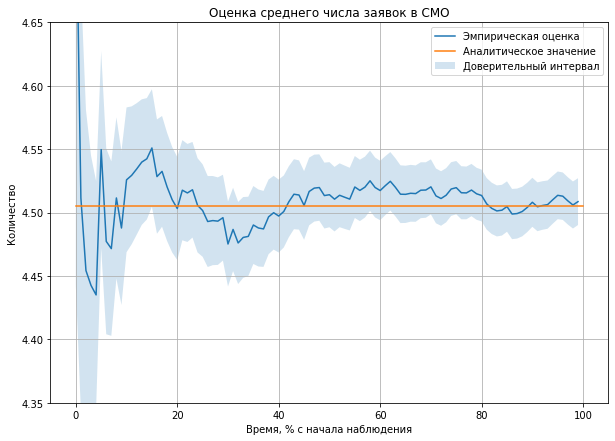

In [35]:
y_val = []
y_err = []
for i in np.linspace(3000, datatime.timeline.max(), 100):
    part_df = datatime.loc[datatime.timeline < i]
    mean = ((sum([i*part_df['state{}'.format(i)].sum() for i in range(1, 7)])) 
            / part_df.timeline.values[-1])
    y_val.append(mean)
    var = ((sum([(i - mean)**2*part_df['state{}'.format(i)].sum() for i in range(1, 7)])) 
           / part_df.timeline.values[-1])
    eps = 3 * (var/part_df.shape[0])**(1/2)
    y_err.append(eps)
y_val = np.array(y_val)
y_err = np.array(y_err)
x_space = [i for i in range(100)]
plt.figure(figsize=(10,7))
plt.plot(x_space, y_val, label='Эмпирическая оценка')
plt.fill_between(x_space, 
                 y_val - y_err, 
                 y_val + y_err, 
                 alpha=0.2, 
                 label='Доверительный интервал')
plt.plot([0, 100], [l_cmo, l_cmo], label='Аналитическое значение')
plt.ylim((4.35, 4.65))
plt.grid(True)
plt.xlabel('Время, % с начала наблюдения')
plt.ylabel('Количество')
plt.title('Оценка среднего числа заявок в СМО')
plt.legend()
plt.show()